### In this lab, you will learn how to extract data with HTML tags.
<b>Beautiful Soup</b> is a library that makes it easy to scrape information from web pages. It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree.<br>
Every page on the web is composed of HTML tags. If you go to any web page and right click and select inspect source you would be able to see the structure of a web page.
- Documentation: https://www.crummy.com/software/BeautifulSoup/bs4/doc/

The <b> urllib.request </b> module defines functions and classes which help in opening URLs. From there, we assign the opening of the url to a beautiful soup, where we can finally use html code to acquire the data. 

The HTML result seems a massive mess, but we did indeed read the source code and able to collect the data with some tricks.

### How to find HTML in your web page?
Open up your web browser and right click to see the menu.
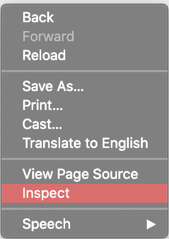

HTML looks like this!
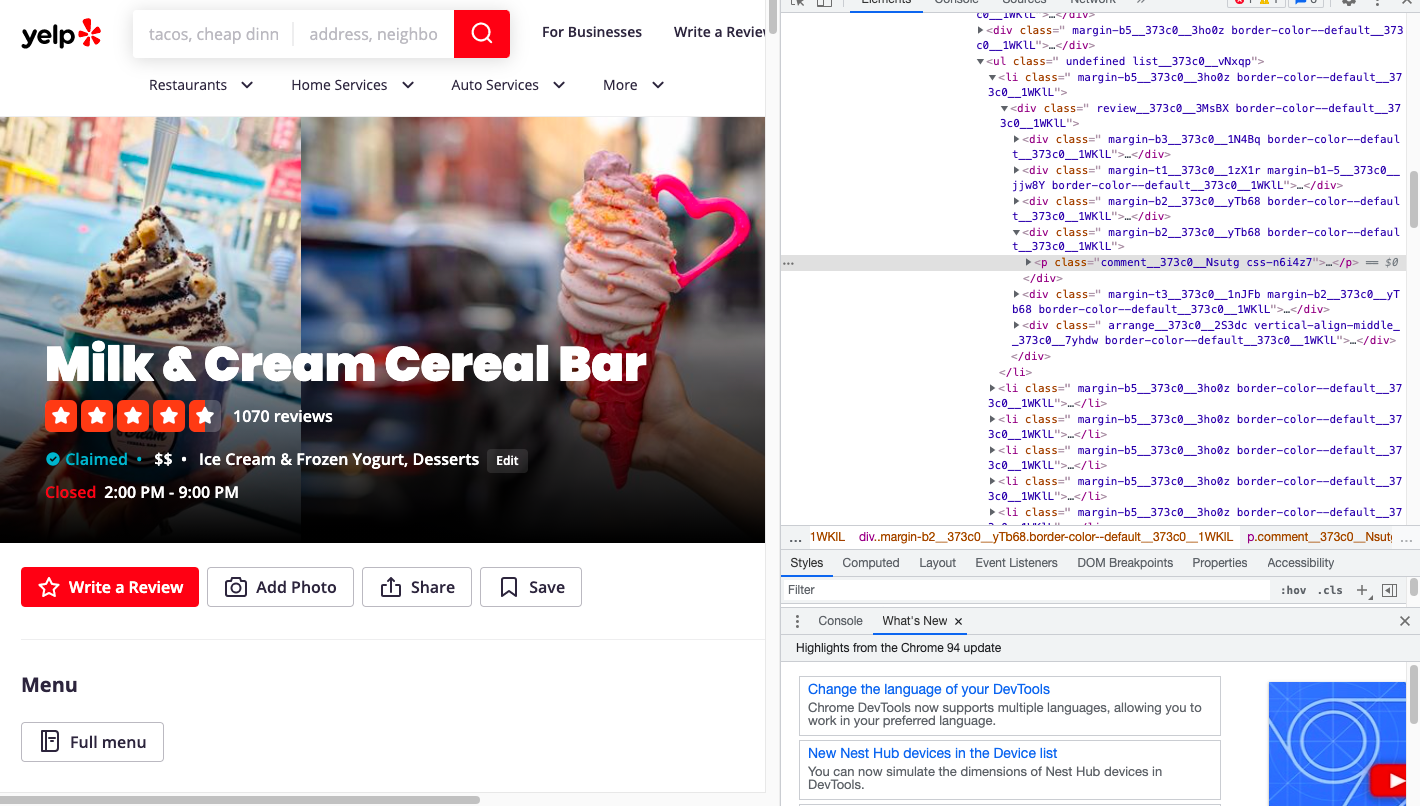

## Steps to get started

**Step 1: Install Beautifulsoup Package 
Run the following command to install BeautifulSoup package.**

In [1]:
!pip install beautifulsoup4

In [2]:
!pip install urllib

ERROR: Could not find a version that satisfies the requirement urllib (from versions: none)
ERROR: No matching distribution found for urllib


In [3]:
# Import packages
from bs4 import BeautifulSoup
import urllib.request


<b>Step 2: Run the following code to crawl the reviews</b>
<br>
In this example, we will collect reviews from Yelp. 

The link to the webpage is here: 
https://www.yelp.com/biz/milk-and-cream-cereal-bar-new-york?osq=Ice+Cream

In [4]:
url = 'https://www.yelp.com/biz/milk-and-cream-cereal-bar-new-york?osq=Ice+Cream'

# Use urllib2 module to open the url 
ourUrl = urllib.request.urlopen(url)

In [5]:
# create a BeautifulSoup object which represents the document as a nested data structure
soup = BeautifulSoup(ourUrl,'html.parser')

In [6]:
type(soup)

bs4.BeautifulSoup

In [7]:
# Print out the HTML content
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US" prefix="og: http://ogp.me/ns#" style="margin: 0;padding: 0; border: 0; font-size: 100%; font: inherit; vertical-align: baseline;">
 <head>
  <script>
   document.documentElement.className=document.documentElement.className.replace(/no-js/,"js");
  </script>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="en-US" http-equiv="Content-Language"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <link content="#FF1A1A" href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/b2bb2fb0ec9c/assets/img/logos/yelp_burst.svg" rel="mask-icon" sizes="any"/>
  <link href="https://s3-media0.fl.yelpcdn.com/assets/srv0/yelp_large_assets/b05852393ae5/assets/img/logos/favicon.ico" rel="shortcut icon"/>
  <script>
   window.ga=window.ga||function(){(ga.q=ga.q||[]).push(arguments)};ga.l=+new Date;window.ygaPageStartTime=new Date().getTime();
  </script>
  <script>
   window.ye

In [8]:
# find all the p tags that contains review
p_tags = soup.find_all('aria-label', attrs={'class':'ffive-stars__09f24__mBKym five-stars--large__09f24__Waiqf display--inline-block__09f24__fEDiJ'})
print(p_tags)

[]


In [9]:
# extract review for each p tag
p_tags[0].text

IndexError: list index out of range

In [ ]:
# Create an empty list to store reviews 
reviews = [] 

for p_tag in p_tags:
    
    # extract review 
    review = p_tag.text
    
     # append review
    reviews.append(review) 

In [ ]:
# how many reviews we collect 
len(reviews)  

In [ ]:
print(reviews)

Well done! You have collect one page of reviews wihtout any noise. 

## Question: How to flip pages?

In [ ]:
# Create an empty list to store reviews 
reviews = []  

# the crawler goes through 10 pages of review and save them in a list
for i in range(0,10):
    
    url = "https://www.yelp.com/biz/milk-and-cream-cereal-bar-new-york?osq=Ice%20Cream&start=" + str(10*i)
    
    ourUrl = urllib.request.urlopen(url)
    
    # create a BeautifulSoup object 
    soup = BeautifulSoup(ourUrl,'html.parser')

    for p_tag in soup.find_all('p',{'class':'comment__09f24__gu0rG css-qgunke'}):  
        
        review = p_tag.text
        reviews.append(review) 
            

In [ ]:
len(reviews)

In [ ]:
# Store review into a txt file 
with open('yelp_review.txt','w', encoding = 'utf-8') as f:
    for review in reviews:
         f.write(review + '\n')  

Check out the 'yelp_review.txt' file, you should have collected 100 yelp reviews. Isn't that cool?! 